In [1]:
import collections

def l():
    return [int(x) for x in open("11.txt").read().split(',')]


class m:
    idgen=0
    
    #get op and modes of following 3 addresses
    def ix(s,x):
        assert(x>=0)
        x="%05d"%(x)
        op=int(x[3:])
        m3,m2,m1=[int(c) for c in x[:3]]
        return op,m1,m2,m3


    def gv(s,p,ip,m,ix):
        assert(ix in [1,2,3])
        if m==0:#reg
            return p[p[ip+ix]]
        elif m==1:#imm
            return p[ip+ix] 
        elif m==2:#reg+rb
            return p[p[ip+ix]+s.rb]
        assert(0)
        
            
        

    
    def __init__(s,p):
        #load to mem
        s.p=collections.defaultdict(int)
        for i,v in enumerate(p):
            s.p[i]=v
            
        #possible data source
        s.supplier=None
        
        #input queue
        s.i=[]
        
        #id
        s.id=m.idgen
        m.idgen+=1
        
        #iterator for execution
        s.it=s.iterator()
        
        #print("M",s.id,"created")
        
        #relative base
        s.rb=0
        
    
    def sendInput(s, i):
        s.i.append(i)
        
    def getData(s):
        return next(s.it)
        
    def iterator(s):
        ip=0
        c=0
        while 1:
            op,m1,m2,m3=s.ix(s.p[ip])
            
            if op==1:#add
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)+s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==2:#mul
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)*s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==3:#in
                assert(m1 in [0,2])
                r=None
                if len(s.i)>0:
                    r=s.i[0]
                    s.i=s.i[1:]
                else:
                    if s.supplier:
                        r=s.supplier.getData()
                    else:
                        print("id",s.id, "returning zero")
                        #assert(0)
                        r=0
                tix=s.p[ip+1]
                if m1==2:
                    tix+=s.rb
                s.p[tix]=r
                ip+=2
            elif op==4:#out
                
                r=s.gv(s.p,ip,m1,1)
                #print(s.id,"spits out",r)
                yield r
                #print("--id:",s.id,"onwards")
                ip+=2
                
            elif op==5:#jump-if-true
                if s.gv(s.p,ip,m1,1):
                    ip=s.gv(s.p,ip,m2,2)
                else:
                    ip+=3
            elif op==6:#jump-if-false
                if not s.gv(s.p,ip,m1,1):
                    ip=s.gv(s.p,ip,m2,2)
                else:
                    ip+=3
            elif op==7:#less-than
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)<s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==8:#equals
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)==s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==9:#adjust relative base
                s.rb+=s.gv(s.p,ip,m1,1)
                ip+=2
            elif op in [99]:#end
                #print("fin", s.id)
                break
            else:
                print("id", s.id, "op",op,"c",c)
                assert(0)
            #print(op)
            c+=1
        
        yield None






In [2]:
labels=["black","white"]
dirs="urdl"
ddirs=[(0,-1),(1,0),(0,1),(-1,0)]
class r:
    def __init__(s):
        s.x=0
        s.y=0
        s.d=0
        s.m=m(l())
        s.m.supplier=s
        s.mp=collections.defaultdict(int)
    
    def upd(s):
        c=s.m.getData()
        if c is None:
            return 0
        t=s.m.getData()
        if t is None:
            return 0
        s.mp[(s.x,s.y)]=c
        if t:
            s.d =(s.d+1)%len(dirs)
        else:
            s.d =(s.d-1)%len(dirs)
        dx,dy=ddirs[s.d]
        s.x+=dx
        s.y+=dy
        return 1
        
    
    def getData(s):
        return s.mp[(s.x,s.y)]
        

def p1():
    b=r()
    while b.upd():
        pass
    return len(b.mp.keys())
    

print("part1",p1(),2418)




part1 2418 2418


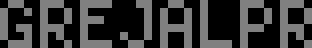

part2: read img GREJALPR


In [3]:
import numpy as np
from PIL import Image
from IPython import display
import cv2

def p2():
    b=r()
    b.mp[(0,0)]=1
    while b.upd():
        pass
    X=[]
    Y=[]
    for k in b.mp.keys():
        if b.mp[k]:
            x,y=k
            X.append(x)
            Y.append(y)
    mx=min(X)
    my=min(Y)
    w=max(X)-mx+1
    h=max(Y)-my+1
    
    img=np.zeros((h,w,3),dtype=np.uint8)
    
    for i in range(len(X)):
        img[Y[i]-my,X[i]-mx,:]=[128,128,128]
    
    F=8
    img = cv2.resize(img, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    

    #display.clear_output(wait=True)
    
    display.display(Image.fromarray(img))

    
    
    
    
    
    return "read img" #len(b.mp.keys())
    

print("part2:",p2(),"GREJALPR")    
    
    